In [1]:
# colab.research.google.com
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)
import keras
import pandas as pd
import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

2.18.0


In [2]:
X_treino = np.array(
[
[113,68], [138,45], [107,55], [137,36], [143,29],
[140,42], [104,63], [145,40], [110,63], [146,39],
[112,56], [148,31], [112,52]
]
)
Y_treino = np.array( [
[-1],[1],[-1],[1],[1],
[1],[-1],[1],[-1],[1],
[-1],[1],[-1] ] )
X_teste = np.array(
[
[110,60], [113,58], [139,35], [144,33], [146,38]
]
)
Y_teste = np.array( [[-1],[-1],[1],[1],[1]] )

In [3]:
Y_teste = np.array( [[-1],[-1],[1],[1],[1]] )

In [4]:
X_train = tf.keras.utils.normalize(X_treino, axis=1)

In [5]:

X_test = tf.keras.utils.normalize(X_teste, axis=1)

In [6]:
X_train

array([[0.85682316, 0.51561039],
       [0.95072984, 0.3100206 ],
       [0.88938437, 0.45716019],
       [0.96716592, 0.25414579],
       [0.98004994, 0.19875139],
       [0.95782629, 0.28734789],
       [0.85530828, 0.51811944],
       [0.96399262, 0.265929  ],
       [0.86775727, 0.49698825],
       [0.96612502, 0.25807449],
       [0.89442719, 0.4472136 ],
       [0.97875978, 0.20501049],
       [0.90700897, 0.42111131]])

In [7]:
X_test

array([[0.87789557, 0.47885213],
       [0.88965347, 0.45663629],
       [0.96973073, 0.2441768 ],
       [0.97473232, 0.22337616],
       [0.9677579 , 0.25188219]])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
modelo = Sequential() # Inicializa a Rede Neural Artificial
modelo.add(Dense(units = 4, activation = 'relu', input_dim = X_train.shape[1]))
modelo.add(Dense(units = 1, activation = 'tanh'))
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
resultado = modelo.fit(X_train, Y_treino, batch_size = 1, epochs = 500, validation_data=(X_test, Y_teste))

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3026 - mae: 1.1139 - val_loss: 1.3494 - val_mae: 1.1374
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2317 - mae: 1.0843 - val_loss: 1.3107 - val_mae: 1.1248
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1908 - mae: 1.0732 - val_loss: 1.2748 - val_mae: 1.1125
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1057 - mae: 1.0345 - val_loss: 1.2440 - val_mae: 1.1015
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1508 - mae: 1.0611 - val_loss: 1.2120 - val_mae: 1.0902
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2188 - mae: 1.0956 - val_loss: 1.1843 - val_mae: 1.0801
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0932 - mae: 1.0370 - val_loss: 1.1709 - val_mae: 1.0752
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0454 - mae: 1.0151 - val_loss: 1.1621 - val_mae: 1.0719
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0468 - mae: 1

In [9]:
Y_predito = modelo.predict(X_test)
Y_predito = [ 1 if y>=0.0 else -1 for y in Y_predito ]
print("Valores Preditos:",Y_predito)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Valores Preditos: [-1, -1, 1, 1, 1]


In [13]:
total = 0
correto = 0
errado = 0
for i in Y_predito:
  total=total+1
  if(Y_teste[i,0] == Y_predito[i]):
    correto=correto+1
  else:
    errado=errado+1
print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))

Total 5
Correto 5
Errado 0


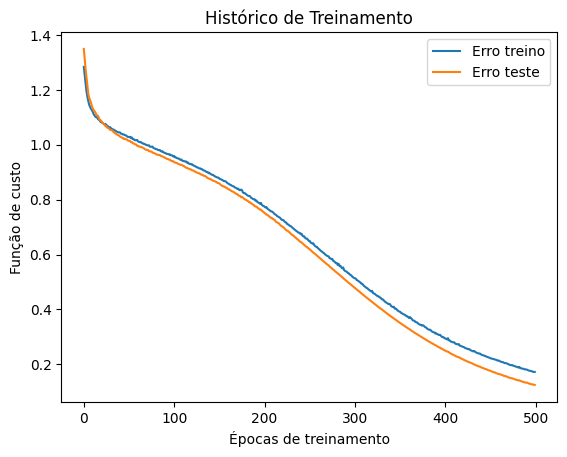

0B -> L1N0: -0.05927622318267822
0B -> L1N1: -0.08024080842733383
0B -> L1N2: 0.0
0B -> L1N3: 0.23459886014461517
L0N0 \ -> L1N0 = 0.10120060294866562
L0N0 \ -> L1N1 = 0.27753210067749023
L0N0 \ -> L1N2 = -0.36361122131347656
L0N0 \ -> L1N3 = 0.5202198624610901
L0N1 \ -> L1N0 = 1.3449288606643677
L0N1 \ -> L1N1 = -0.995634913444519
L0N1 \ -> L1N2 = -0.6235144138336182
L0N1 \ -> L1N3 = -1.3170636892318726
1B -> L2N0: 0.06673998385667801
L1N0 \ -> L2N0 = -1.4858793020248413
L1N1 \ -> L2N0 = -0.7697990536689758
L1N2 \ -> L2N0 = 0.49421238899230957
L1N3 \ -> L2N0 = 3.205540895462036


In [15]:
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()
# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  for toNeuronNum, bias in enumerate(biases):
    print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
  for fromNeuronNum, wgt in enumerate(weights):
    for toNeuronNum, wgt2 in enumerate(wgt):
      print(f'L{layerNum}N{fromNeuronNum} \ -> L{layerNum+1}N{toNeuronNum} = {wgt2}')